<a href="https://colab.research.google.com/github/sandeshragashetty22/DBS_web_dev_IS_system_CA/blob/main/Applied_research_project_artefact_20014943_sandesh_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Artefact - Applied Research Project**

**Predictive Analytics of CO2 emission from Agri-Food Activities Using Machine Learning**

Student Name:Sandesh Ragashetti                                      
Student Id: 20014943

**Problem Defination: This project aims to carry out predictive analysis of CO2 emission from the agri-food sector where various activities of agriculture have been selected to understand the factors that affect most of the emission and cause temperature rise in the global. This artefact work will identify the best performing model among four defined models, which includes the calculation of metrics and comparative analysis of these models. Exploratory data analysis will show clear visualization of affecting factors to the total emission and temperature rise around the globe from the past 30 years. Finally, CO2 emission and temperature rise analysis will be done through the best performing model and conclude the outcomes of results which helps the policy makers, researchers, and industry stakeholders to take the actions in coming years against the CO2 emission reduction and global climate change.**


**Note: More details about code, tables, and graphs are explained clearly in Report.**

# 1. Data Preparation

Data Preparation is the one of the step in data mining project, where data is collected here and passed for different processes before analysis and modeling.

In [ ]:
#Importing necessary libraries for the project
import pandas as pd
import numpy as np

#libraries for Transformation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#libraries for visualisation
import matplotlib.pyplot as plot
import seaborn as sns

# Required libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#for testing
from scipy.stats import ttest_rel
import statsmodels.api as sm

#For Nueral network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Loading the 'Agrofood_co2_emission.csv' data file in sample data folder of the colab notebook

In [ ]:
#Loading the CSV data file 'Agrofood_co2_emission'
file_csv_path = '/content/sample_data/Agrofood_co2_emission.csv'
data_f = pd.read_csv(file_csv_path)

## 1.1 Feature Selection

In this section, required features from agri-food section is collected and setting it to the variable called 'data_f'.

In [ ]:
# Considering only relevant columns required for the analysis and modeling
relevant_columns = [
    'Area', 'Year', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Fertilizers Manufacturing', 'Manure applied to Soils', 'Fires in organic soils',
    'Food Transport', 'Food Packaging', 'Manure left on Pasture', 'Manure Management',
    'Average Temperature °C'
]
data_f = data_f[relevant_columns]

## 1.2. Data Cleaning

In this step, missing values are checked and filled them with median value obtained from that column.

In [ ]:
# check the missing values
data_f.isnull().sum()

,0
Area,0
Year,0
Crop Residues,1389
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Agrifood Systems Waste Disposal,0
Food Processing,0
Fertilizers Manufacturing,0
Manure applied to Soils,928


In [ ]:
# Filling missing values with the median value of each column for numeric columns only
filled_data = data_f.fillna(data_f.mean(numeric_only=True))

#Verifying if there are any missing values left after filling missing values
filled_data.isnull().sum()

,0
Area,0
Year,0
Crop Residues,0
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Agrifood Systems Waste Disposal,0
Food Processing,0
Fertilizers Manufacturing,0
Manure applied to Soils,0


# 1.3. Data Wrangling

## 1.3.1. Data Aggregation

**Merging existing columns to create new features, this assigns the activities of same category into one group.**

In [ ]:
data_f['Organic Soil Emission'] = data_f['Drained organic soils (CO2)'] + data_f['Fires in organic soils']
data_f['Food Supply Chain'] = data_f['Food Processing'] + data_f['Food Packaging']+ data_f['Food Transport']
data_f['Agrochemical Manufacturing'] = data_f['Fertilizers Manufacturing'] + data_f['Pesticides Manufacturing']
data_f['Emission from Manure'] = data_f['Manure applied to Soils'] + data_f['Manure left on Pasture'] + data_f['Manure Management']

<ipython-input-6-cba08734840b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Organic Soil Emission'] = data_f['Drained organic soils (CO2)'] + data_f['Fires in organic soils']
<ipython-input-6-cba08734840b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Food Supply Chain'] = data_f['Food Processing'] + data_f['Food Packaging']+ data_f['Food Transport']
<ipython-input-6-cba08734840b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

**Dropping the redundunt columns**

Dropping the original columns after merging them to create new features to simplify the dataset.

In [ ]:
# Dropping the original columns after merging the columns to new variable
columns_to_drop = [
    'Drained organic soils (CO2)', 'Fires in organic soils',
    'Food Processing', 'Food Packaging', 'Food Transport',
    'Fertilizers Manufacturing', 'Pesticides Manufacturing',
    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management'
]
data_f = data_f.drop(columns=columns_to_drop)

**Calculating Total Emission**

In [ ]:
# Calculating the total emission and updating the 'Total Emission (kt)' column, based on the selected relevant columns.
data_f['Total Emission (kt)'] = data_f[['Crop Residues', 'Rice Cultivation', 'Agrifood Systems Waste Disposal', 'Organic Soil Emission',
                                   'Food Supply Chain','Agrochemical Manufacturing', 'Emission from Manure']].sum(axis=1)


**Reordering the columns for easy evaluation and understanding.**

In [ ]:
# Reorder the columns
ordered_columns = [
    'Area', 'Year', 'Crop Residues', 'Rice Cultivation', 'Agrifood Systems Waste Disposal',
    'Organic Soil Emission', 'Food Supply Chain', 'Agrochemical Manufacturing', 'Emission from Manure',
    'Total Emission (kt)', 'Average Temperature °C'
]

data_f = data_f[ordered_columns]

## 1.3.2 Data Splitting

In [ ]:
# Required libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV

**# Splitting the data into features and target variables**

In [ ]:

# selecting 'CO2_Emissions' and ' Average Temperature' are the original target variable columns
# Finding the dummy columns related to these original target columns
emission_column = [col for col in data_f.columns if 'Total Emission (kt)' in col]
temperature_column = [col for col in data_f.columns if 'Average Temperature °C' in col]

#exclude these target variable columns from the feature set to separate the input features and target variables.
# Dropping the the target variables from the input features.
x_features = data_f.drop(emission_column + temperature_column, axis=1)
x_features = data_f.drop(columns=['Area', 'Year'])

# Extracting targert columns into variables.
y_emissions = data_f[emission_column]
y_temperature = data_f[temperature_column]

**Splitting the data into training and testing set in the ratio of 70:30**

In [ ]:

#training and testing set for emission
X_train_emissions, X_test_emissions, Y_train_emissions, Y_test_emissions = train_test_split(x_features, y_emissions, test_size=0.3, random_state=10)

#training and testing set for temperature
X_train_temp, X_test_temp, Y_train_temp, Y_test_temp = train_test_split(x_features, y_temperature, test_size=0.3, random_state=10)

## 1.3.3 Data Transformation

In [ ]:
# Standardizing the selected features
obj_scaler = StandardScaler()

#for emission
X_train_emissions = obj_scaler.fit_transform(X_train_emissions)
X_test_emissions = obj_scaler.transform(X_test_emissions)

#for temperature
X_train_temp = obj_scaler.fit_transform(X_train_temp)
X_test_temp = obj_scaler.transform(X_test_temp)

In [ ]:
from sklearn.impute import SimpleImputer
#Imputing missing values into the column, using mean imputation
obj_imputer = SimpleImputer(strategy='mean')

#for emission
X_train_emissions_imp = obj_imputer.fit_transform(X_train_emissions)
X_test_emissions_imp = obj_imputer.transform(X_test_emissions)

#for temperature
X_train_temp_imp = obj_imputer.fit_transform(X_train_temp)
X_test_temp_imp = obj_imputer.transform(X_test_temp)

# 2. Exploratory Data analysis

## 2.1. Data Understanding

**Displaying first 5 rows of the data to know the structure and columns**

In [ ]:
data_f.head()

,Area,Year,Crop Residues,Rice Cultivation,Agrifood Systems Waste Disposal,Organic Soil Emission,Food Supply Chain,Agrochemical Manufacturing,Emission from Manure,Total Emission (kt),Average Temperature °C
0,Afghanistan,1990,205.6077,686.00,691.7888,0.0,382.960756,23.804483,2169.8513,4160.013039,0.536167
1,Afghanistan,1991,209.4971,678.16,710.8212,0.0,381.058056,24.565973,2268.1735,4272.275829,0.020667
2,Afghanistan,1992,196.5341,686.00,743.6751,0.0,373.162556,25.204973,2267.4190,4291.995729,-0.259583
3,Afghanistan,1993,230.8175,686.00,791.9246,0.0,374.207256,25.767973,2256.9791,4365.696429,0.101917
4,Afghanistan,1994,242.0494,705.60,831.9181,0.0,373.832956,26.838973,2324.6596,4504.899029,0.372250


**Descriptive statistics of the data**

Descriptive statistics helps in understanding the spread (std, min, max), central tendency (mean, median), and the overall distribution (quartiles) for each numerical variable of the agri-food data.

In [ ]:
data_f.describe().drop(columns=['Year'])

,Crop Residues,Rice Cultivation,Agrifood Systems Waste Disposal,Organic Soil Emission,Food Supply Chain,Agrochemical Manufacturing,Emission from Manure,Total Emission (kt),Average Temperature °C
count,5576.000000,6965.000000,6965.000000,6.965000e+03,6965.000000,6965.000000,6037.000000,6.965000e+03,6965.000000
mean,998.706309,4259.666673,6018.444633,4.713544e+03,7470.936029,3369.141749,6772.713670,3.250161e+04,0.872989
std,3700.345330,17613.825187,22156.742542,3.515691e+04,34842.031265,12786.505252,19537.979375,1.119052e+05,0.555930
min,0.000200,0.000000,0.340000,0.000000e+00,23.186100,0.473200,0.482600,7.262568e+02,-1.415833
25%,11.006525,181.260800,86.680500,0.000000e+00,346.608417,404.705622,195.438400,3.667300e+03,0.511333
50%,103.698200,534.817400,901.275700,0.000000e+00,620.441780,1440.678229,1383.779500,6.953818e+03,0.834300
75%,377.640975,1536.640000,3006.442100,6.916873e+02,2803.326650,2338.417463,4800.693500,1.580989e+04,1.206750
max,33490.074100,164915.255600,213289.701600,1.181812e+06,478554.086400,182269.423300,159007.844900,1.347692e+06,3.558083


**To check the non null values and data type of each column.**

In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Crop Residues                    5576 non-null   float64
 3   Rice Cultivation                 6965 non-null   float64
 4   Agrifood Systems Waste Disposal  6965 non-null   float64
 5   Organic Soil Emission            6965 non-null   float64
 6   Food Supply Chain                6965 non-null   float64
 7   Agrochemical Manufacturing       6965 non-null   float64
 8   Emission from Manure             6037 non-null   float64
 9   Total Emission (kt)              6965 non-null   float64
 10  Average Temperature °C           6965 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 598.7+ KB


**Identifing the numerical and non-numeric columns**

In [ ]:
non_numeric_cols = data_f.select_dtypes(include=['object']).columns
numerical_cols = data_f.select_dtypes(include=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_cols)
print("Numeric columns:", numerical_cols)

Non-numeric columns: Index(['Area'], dtype='object')
Numeric columns: Index(['Year', 'Crop Residues', 'Rice Cultivation',
       'Agrifood Systems Waste Disposal', 'Organic Soil Emission',
       'Food Supply Chain', 'Agrochemical Manufacturing',
       'Emission from Manure', 'Total Emission (kt)',
       'Average Temperature °C'],
      dtype='object')


## 2.2. Data Visualizations

**1. Total Emission and Average temperature over time**

In [ ]:
# Aggregating data for all areas
total_emission_over_years = data_f.groupby('Year')['Total Emission (kt)'].sum()
avg_temp_over_years = data_f.groupby('Year')['Average Temperature °C'].mean()

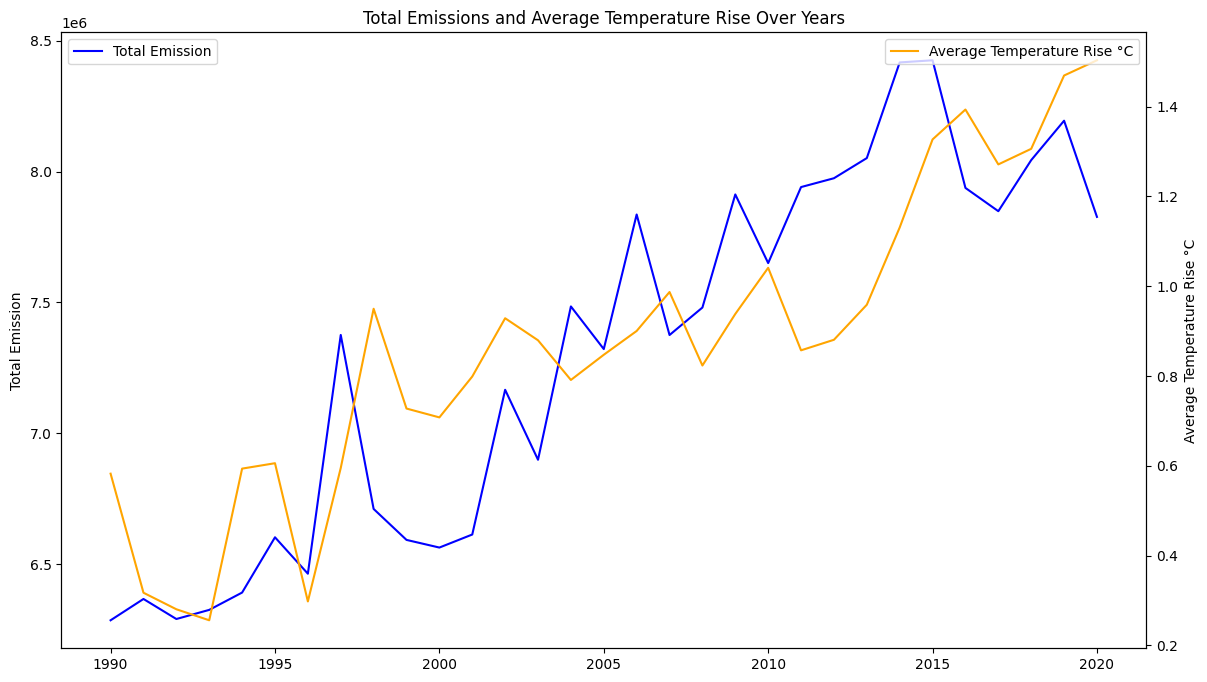

In [ ]:
import matplotlib.pyplot as plot

# Rolling mean for trend analysis
rolling_window = 5
total_emission_rolling = total_emission_over_years.rolling(window=rolling_window).mean()
avg_temp_rolling = avg_temp_over_years.rolling(window=rolling_window).mean()

# Total Emissions and Average Temperature Over Time
fig, y1 = plot.subplots(figsize=(14, 8))

# Plotting total emissions
y1.plot(total_emission_over_years, label='Total Emission', color='blue')
y1.set_ylabel('Total Emission')
y1.set_title('Total Emissions and Average Temperature Rise Over Years')
y1.legend(loc='upper left')

# Plotting average temperature rise
y2 = y1.twinx()
y2.plot(avg_temp_over_years, color='orange', label='Average Temperature Rise °C')
y2.set_ylabel('Average Temperature Rise °C')
y2.legend(loc='upper right')

plot.show()


**2. Emissions Breakdown by Category Over Years**

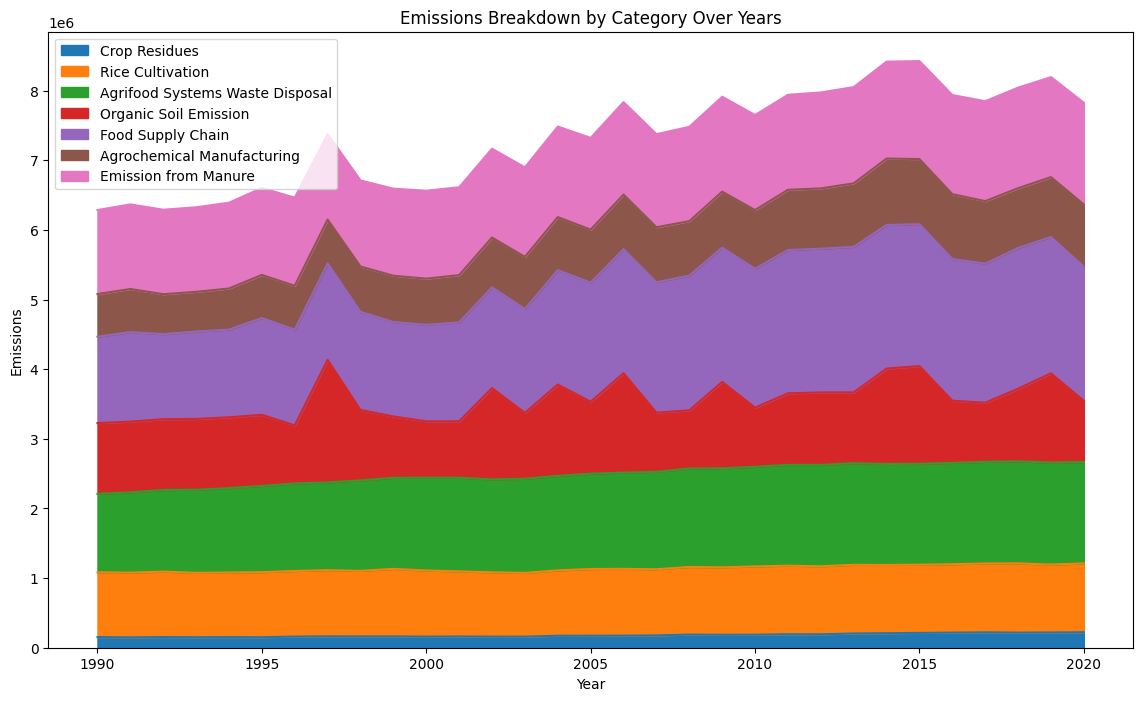

In [ ]:
# Emissions breakdown by category over time
emission_categories = ['Crop Residues', 'Rice Cultivation', 'Agrifood Systems Waste Disposal', 'Organic Soil Emission',
                        'Food Supply Chain','Agrochemical Manufacturing', 'Emission from Manure']

emission_over_time = data_f.groupby('Year')[emission_categories].sum()

fig, axis = plot.subplots(figsize=(14, 8))

# Plotting emissions breakdown by category
emission_over_time.plot(kind='area', stacked=True, ax=axis)
axis.set_title('Emissions Breakdown by Category Over Years')
axis.set_ylabel('Emissions')
axis.set_xlabel('Year')

plot.show()


**3.Correlation Matrix**


In [ ]:
#dropping non related columns for correlation matrix
numeric_data = data_f.copy()
numeric_data_copy = numeric_data.drop(columns=['Year', 'Average Temperature °C', 'Area', 'Total Emission (kt)'])

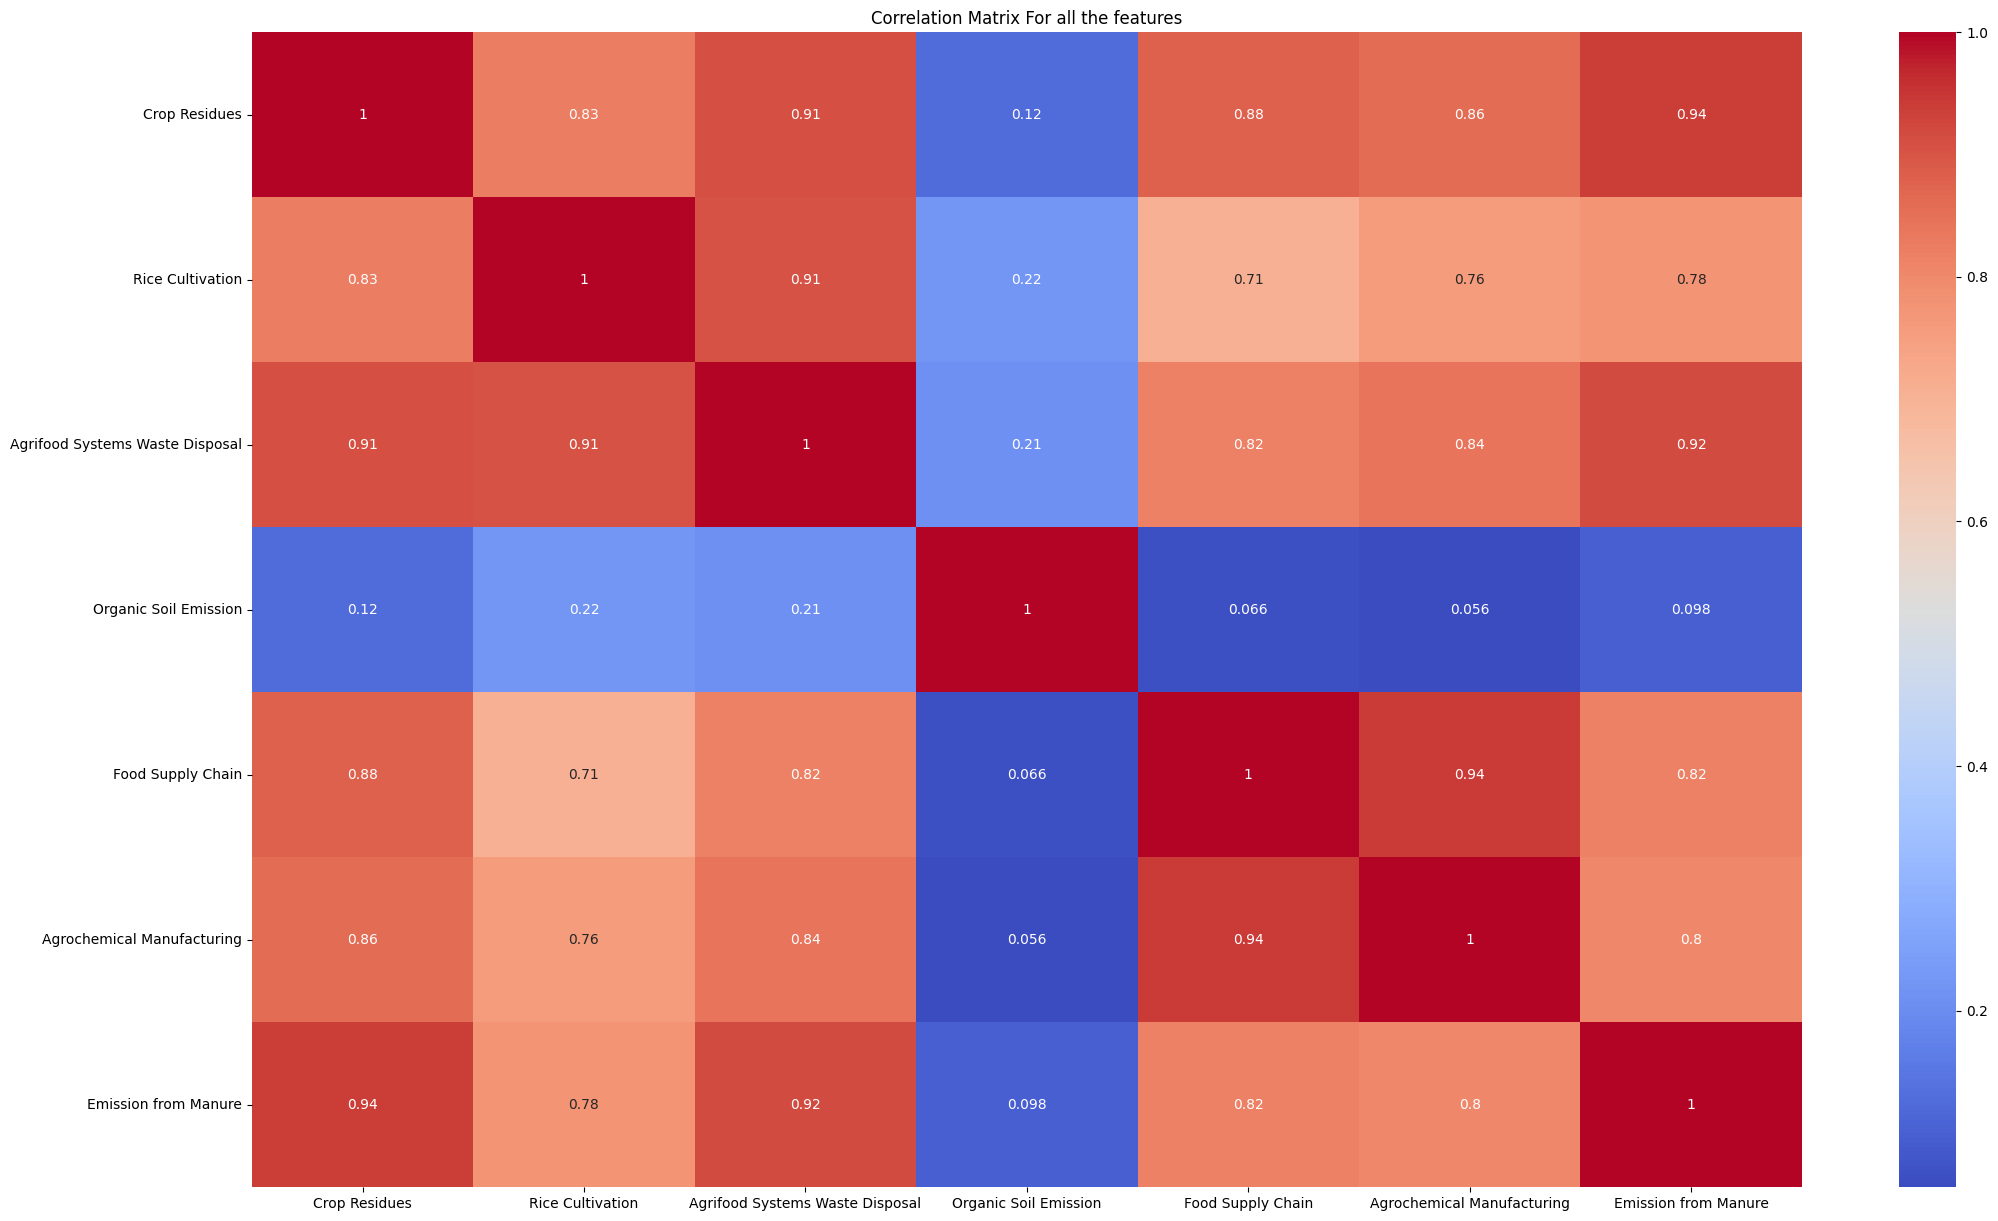

In [ ]:
# Plot correlation matrix
plot.figure(figsize=(25, 15))
correlation_matrix = numeric_data_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plot.title('Correlation Matrix For all the features')
plot.show()

**4. Top countries by Total Emission**

In [ ]:
country_data = data_f.groupby('Area')['Total Emission (kt)'].sum().reset_index()

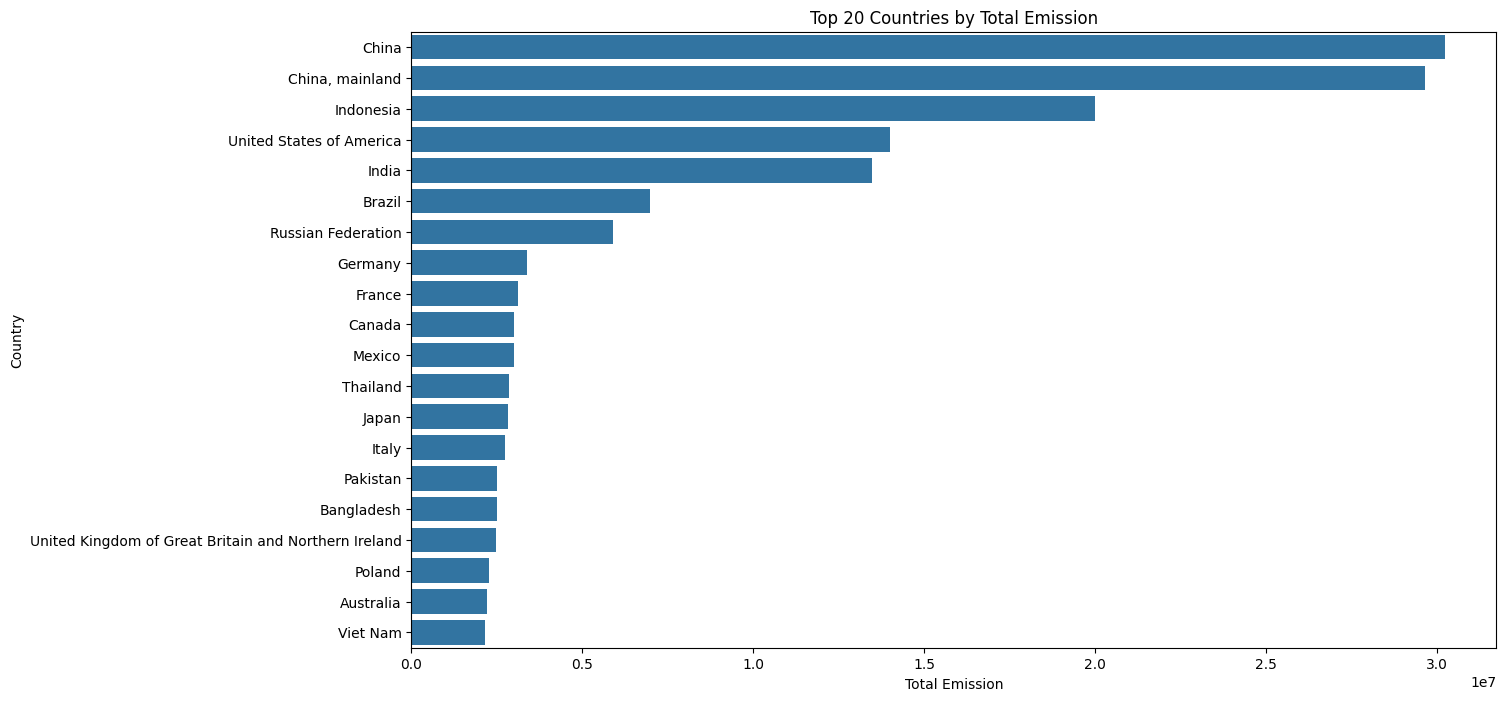

In [ ]:
plot.figure(figsize=(14, 8))
sns.barplot(x='Total Emission (kt)', y='Area', data=country_data.sort_values(by='Total Emission (kt)', ascending=False).head(20))
plot.title('Top 20 Countries by Total Emission')
plot.xlabel('Total Emission')
plot.ylabel('Country')
plot.show()

**5. Mean CO2 Emissions for All agri-food activities**

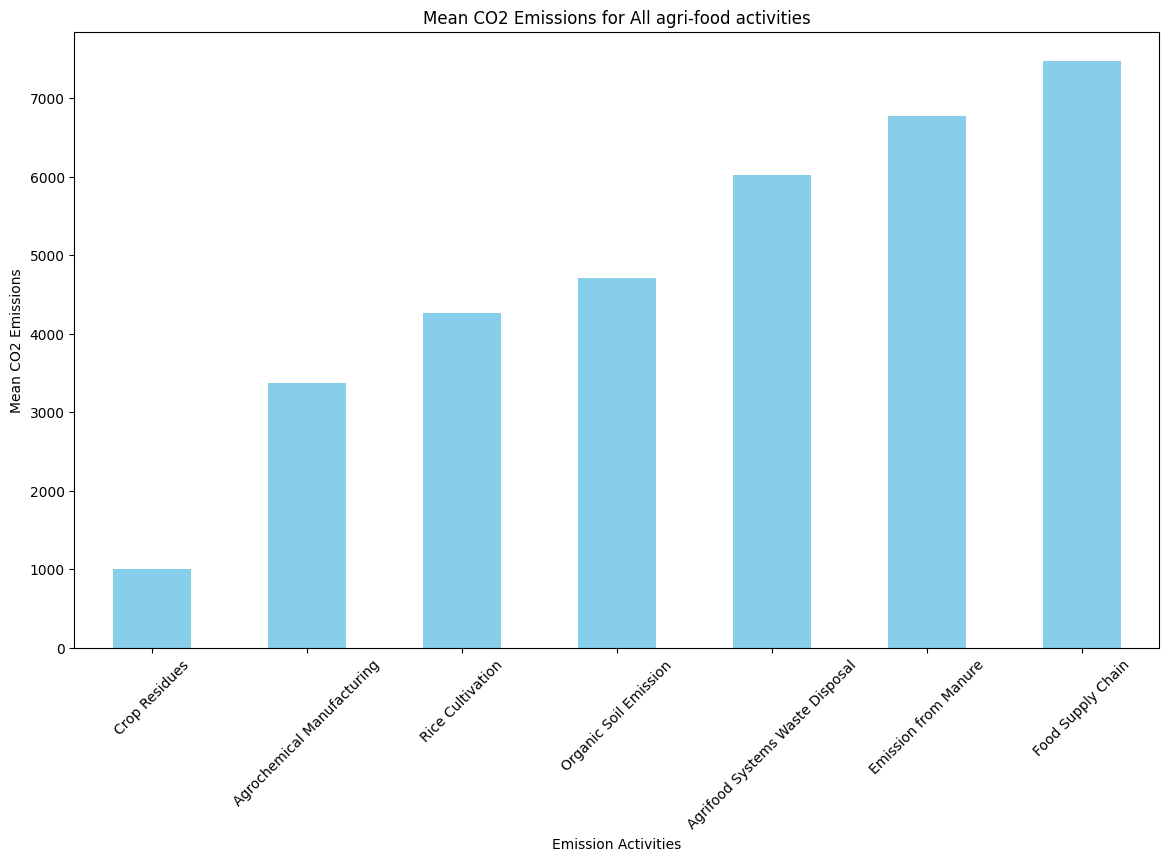

In [ ]:
# Calculate the mean CO2 emissions for all factors
emission_factors = ['Crop Residues', 'Rice Cultivation', 'Agrifood Systems Waste Disposal', 'Organic Soil Emission',
                                   'Food Supply Chain','Agrochemical Manufacturing', 'Emission from Manure']

mean_emissions = data_f[emission_factors].mean().sort_values()

# Mean CO2 Emissions for All Factors
plot.figure(figsize=(14, 8))
mean_emissions.plot(kind='bar', color='skyblue')
plot.title('Mean CO2 Emissions for All agri-food activities')
plot.xlabel('Emission Activities')
plot.ylabel('Mean CO2 Emissions')
plot.xticks(rotation=45)
plot.show()

**6. Bar Plot of Total Emissions for Each Year**

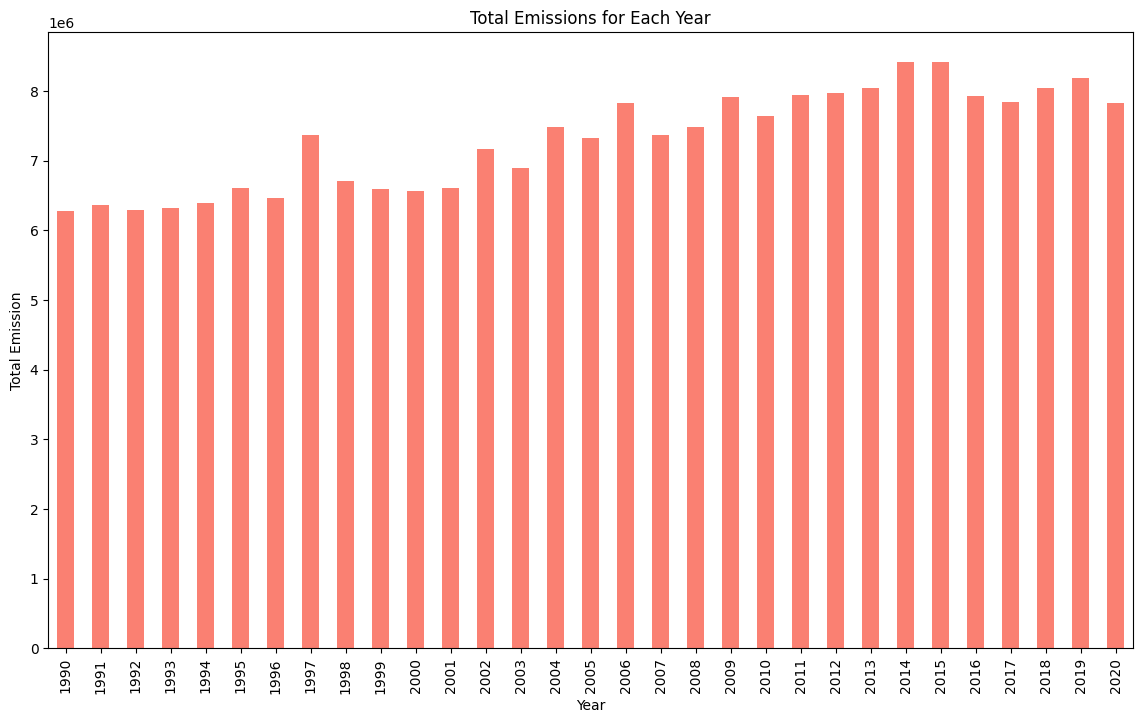

In [ ]:
# Bar Plot of Total Emissions for Each Year
plot.figure(figsize=(14, 8))
total_emissions_year = data_f.groupby('Year')['Total Emission (kt)'].sum()
total_emissions_year.plot(kind='bar', color='salmon')
plot.title('Total Emissions for Each Year')
plot.xlabel('Year')
plot.ylabel('Total Emission')
plot.xticks(rotation=90)
plot.show()

# 3. Modeling and Evaluation

##3.1. Model training and testing

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Helper function for evaluation metrics
def model_evaluation(y_actual, y_pred):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    return mse, rmse, mae, r2

### **Linear Regression**

In [ ]:
# Linear Regression
lin_reg_emission = LinearRegression()

#For emission
lin_reg_emission.fit(X_train_emissions_imp, Y_train_emissions)
y_pred_lin_reg_emission = lin_reg_emission.predict(X_test_emissions_imp)
lin_reg_metric_emission = model_evaluation(Y_test_emissions, y_pred_lin_reg_emission)

#for temperature
lin_reg_temp = LinearRegression()
lin_reg_temp.fit(X_train_temp_imp, Y_train_temp)
y_pred_lin_reg_temp = lin_reg_temp.predict(X_test_temp_imp)
lin_reg_metrics_temp = model_evaluation(Y_test_temp, y_pred_lin_reg_temp)

### **Decision Tree Model**

In [ ]:
 # Decision Tree Hyperparameter Tuning
dt_param_grid_ht = {'max_depth': [None, 10, 20, 30, 40, 50],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]
 }

In [ ]:
# Decision Tree
dec_tre_emission = DecisionTreeRegressor(random_state=10)
dt_emission_grid_search = GridSearchCV(estimator=dec_tre_emission, param_grid=dt_param_grid_ht, cv=5, n_jobs=-1, scoring='r2')

#for emission
dt_emission_grid_search.fit(X_train_emissions_imp, Y_train_emissions)
dt_best_emission = dt_emission_grid_search.best_estimator_
y_pred_dt_emission = dt_best_emission.predict(X_test_emissions_imp)
dec_tre_metric_emission = model_evaluation(Y_test_emissions, y_pred_dt_emission)

#for temperature
dec_tre_temp = DecisionTreeRegressor(random_state=10)
grid_search_dt_temp = GridSearchCV(estimator=dec_tre_temp, param_grid=dt_param_grid_ht, cv=5, n_jobs=-1, scoring='r2')
grid_search_dt_temp.fit(X_train_temp_imp, Y_train_temp)
best_dt_temp = grid_search_dt_temp.best_estimator_
y_pred_temp_dt = best_dt_temp.predict(X_test_temp_imp)
dec_tre_metric_temp = model_evaluation(Y_test_temp, y_pred_temp_dt)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


### **Random Forest**

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid_ht = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest
#for emisssion
ran_for_emission = RandomForestRegressor(random_state=10)
rf_random_search_emission  = RandomizedSearchCV(estimator=ran_for_emission, param_distributions=rf_param_grid_ht,
                                                n_iter=10, cv=3, n_jobs=-1, scoring='r2', random_state=10)
rf_random_search_emission.fit(X_train_emissions_imp, Y_train_emissions)
rf_best_emission = rf_random_search_emission.best_estimator_
y_pred_rf_emission = rf_best_emission.predict(X_test_emissions_imp)
rf_metric_emission = model_evaluation(Y_test_emissions, y_pred_rf_emission)

#for temperature
ran_for_temp = RandomForestRegressor(random_state=10)
rf_random_search_temp = RandomizedSearchCV(estimator=ran_for_temp, param_distributions=rf_param_grid_ht,
                                           n_iter=10, cv=3, n_jobs=-1, scoring='r2', random_state=10)
rf_random_search_temp.fit(X_train_temp_imp, Y_train_temp)
rf_best_temp = rf_random_search_temp.best_estimator_
y_pred_rf_temp = rf_best_temp.predict(X_test_temp_imp)
rf_metric_temp = model_evaluation(Y_test_temp, y_pred_rf_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### **Neural Network**

In [ ]:
#Nueral network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Function to create and compile the neural network model
def neu_net_model_creation(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Neural Network for CO2 Emissions
nn_emission = neu_net_model_creation(input_dim=X_train_emissions_imp.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
hist_emission = nn_emission.fit(X_train_emissions_imp, Y_train_emissions,
                                      validation_split=0.3,
                                      epochs=100,
                                      batch_size=32,
                                      callbacks=[early_stopping],
                                      verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 11558571008.0000 - val_loss: 12541665280.0000
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16026875904.0000 - val_loss: 12527162368.0000
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12450610176.0000 - val_loss: 12485399552.0000
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12027829248.0000 - val_loss: 12398599168.0000
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12431605760.0000 - val_loss: 12252843008.0000
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11424250880.0000 - val_loss: 12040412160.0000
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10312950784.0000 - val_loss: 11757793280.0000
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12554019840.0000 - val_loss: 11378579456.0000
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10222160896.0000 - val_loss: 10939736064.0000
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━

In [ ]:
# Predictions and evaluation for CO2 Emissions
y_pred_nn_emission = nn_emission.predict(X_test_emissions_imp)
nn_metric_emission = model_evaluation(Y_test_emissions, y_pred_nn_emission)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Neural Network for Temperature
nn_temp = neu_net_model_creation(input_dim=X_train_temp_imp.shape[1])
history_temp = nn_temp.fit(X_train_temp_imp, Y_train_temp,
                              validation_split=0.3,
                              epochs=100,
                              batch_size=32,
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3515 - val_loss: 0.0253
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - val_loss: 0.0116
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - val_loss: 0.0055
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [ ]:
# Predictions and evaluation for Temperature
y_pred_temp_nn = nn_temp.predict(X_test_temp_imp)
nn_metric_temp = model_evaluation(Y_test_temp, y_pred_temp_nn)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## 3.2. Evaluation Metrics for all the models

In [ ]:
# CO2 emission model performance metrics
emission_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE (Emissions)': [lin_reg_metric_emission[0], dec_tre_metric_emission[0], rf_metric_emission[0], nn_metric_emission[0]],
    'RMSE (Emissions)': [lin_reg_metric_emission[1], dec_tre_metric_emission[1], rf_metric_emission[1], nn_metric_emission[1]],
    'MAE (Emissions)': [lin_reg_metric_emission[2], dec_tre_metric_emission[2], rf_metric_emission[2], nn_metric_emission[2]],
    'R2 (Emissions)': [lin_reg_metric_emission[3], dec_tre_metric_emission[3], rf_metric_emission[3], nn_metric_emission[3]]
})

print(emission_metrics)


               Model  MSE (Emissions)  RMSE (Emissions)  MAE (Emissions)  \
0  Linear Regression     2.407439e-22      1.551592e-11     8.379808e-12   
1      Decision Tree     3.886174e+06      1.971338e+03     2.831836e+02   
2      Random Forest     1.971352e+06      1.404049e+03     1.901290e+02   
3     Neural Network     5.136396e+06      2.266362e+03     1.648255e+03   

   R2 (Emissions)  
0        1.000000  
1        0.999690  
2        0.999843  
3        0.999590  


In [ ]:
## temperature rise model performance metrics
temperature_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE (Temperature)': [lin_reg_metrics_temp[0], dec_tre_metric_temp[0], rf_metric_temp[0], nn_metric_temp[0]],
    'RMSE (Temperature)': [lin_reg_metrics_temp[1], dec_tre_metric_temp[1], rf_metric_temp[1], nn_metric_temp[1]],
    'MAE (Temperature)': [lin_reg_metrics_temp[2], dec_tre_metric_temp[2], rf_metric_temp[2], nn_metric_temp[2]],
    'R2 (Temperature)': [lin_reg_metrics_temp[3], dec_tre_metric_temp[3], rf_metric_temp[3], nn_metric_temp[3]]
})

print(temperature_metrics)

               Model  MSE (Temperature)  RMSE (Temperature)  \
0  Linear Regression       1.338944e-31        3.659158e-16   
1      Decision Tree       3.354067e-05        5.791431e-03   
2      Random Forest       1.181210e-05        3.436874e-03   
3     Neural Network       1.930699e-04        1.389496e-02   

   MAE (Temperature)  R2 (Temperature)  
0       2.700358e-16          1.000000  
1       1.299185e-03          0.999890  
2       6.883550e-04          0.999961  
3       6.697278e-03          0.999369  


## 3.3. Comparative Analysis

### Comparative Analysis between all the selected models for CO2 emission

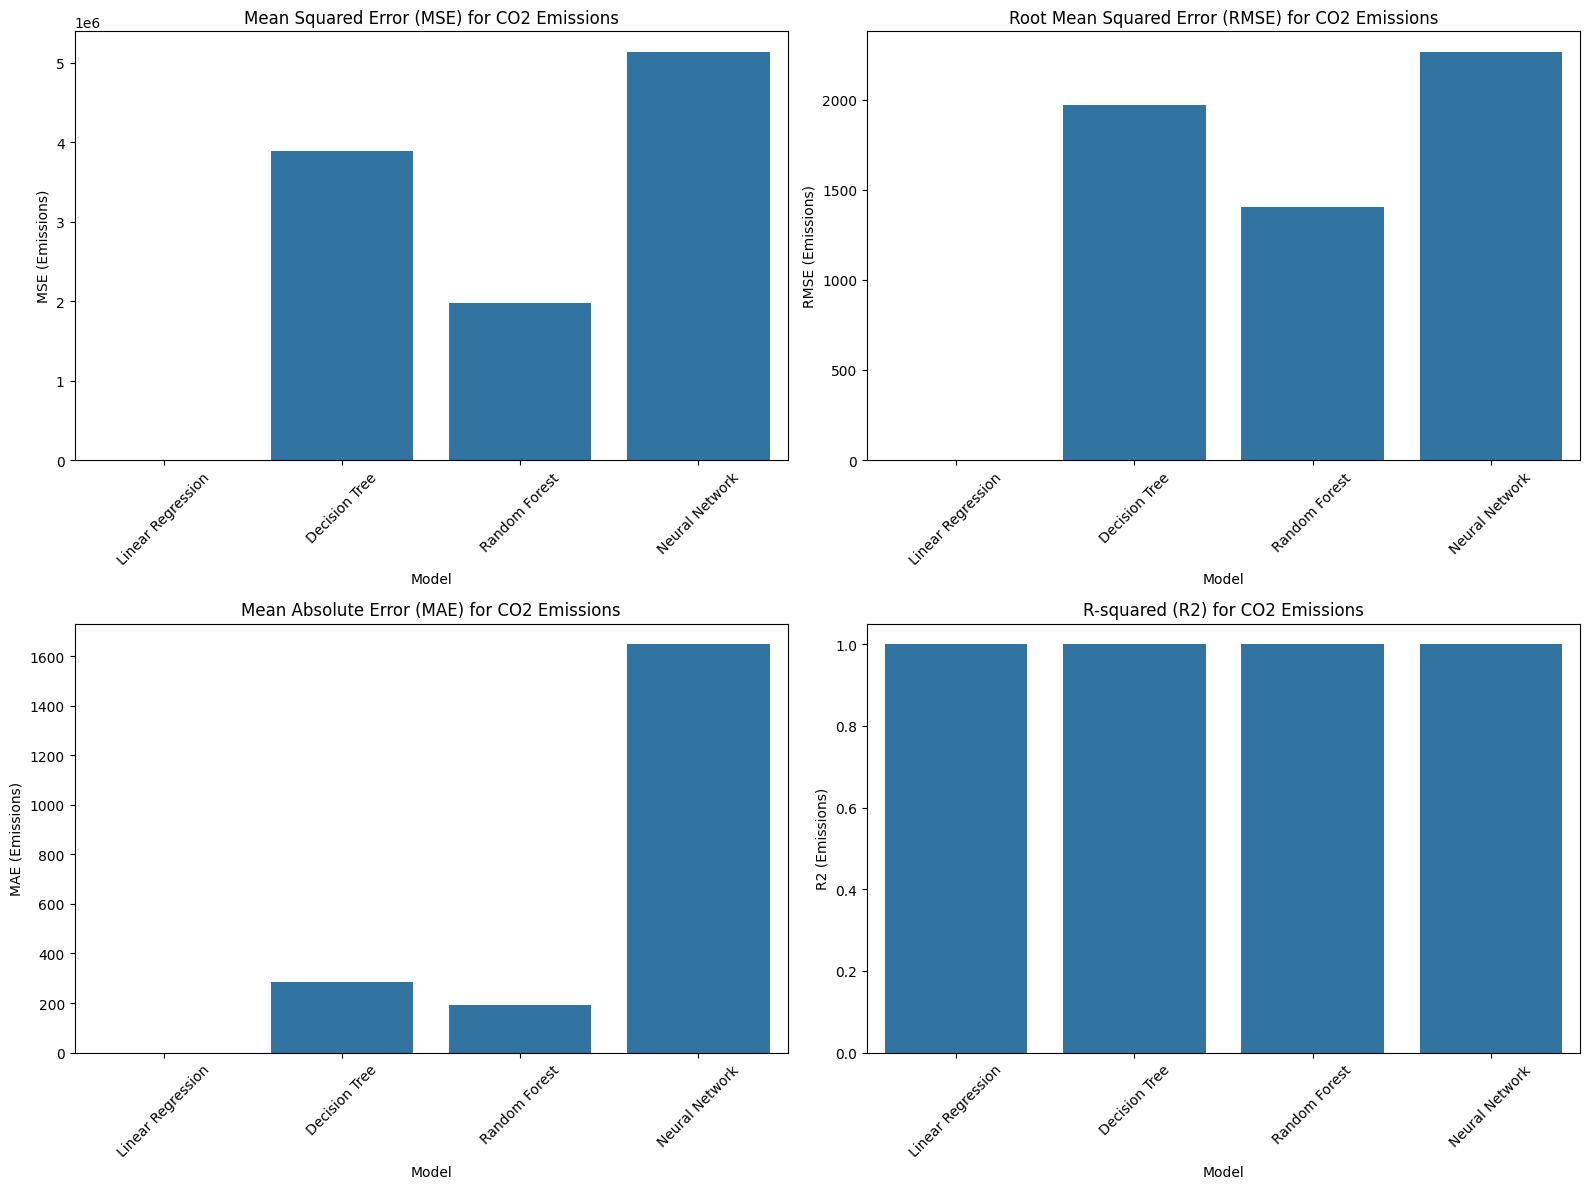

In [ ]:
# Visualization: Comparison Metrics
plot.figure(figsize=(16, 12))

plot.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE (Emissions)', data=emission_metrics)
plot.title('Mean Squared Error (MSE) for CO2 Emissions')
plot.xticks(rotation=45)

plot.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE (Emissions)', data=emission_metrics)
plot.title('Root Mean Squared Error (RMSE) for CO2 Emissions')
plot.xticks(rotation=45)

plot.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE (Emissions)', data=emission_metrics)
plot.title('Mean Absolute Error (MAE) for CO2 Emissions')
plot.xticks(rotation=45)

plot.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2 (Emissions)', data=emission_metrics)
plot.title('R-squared (R2) for CO2 Emissions')
plot.xticks(rotation=45)

plot.tight_layout()
plot.show()


### Comparative Analysis between all the selected models for temperature rise

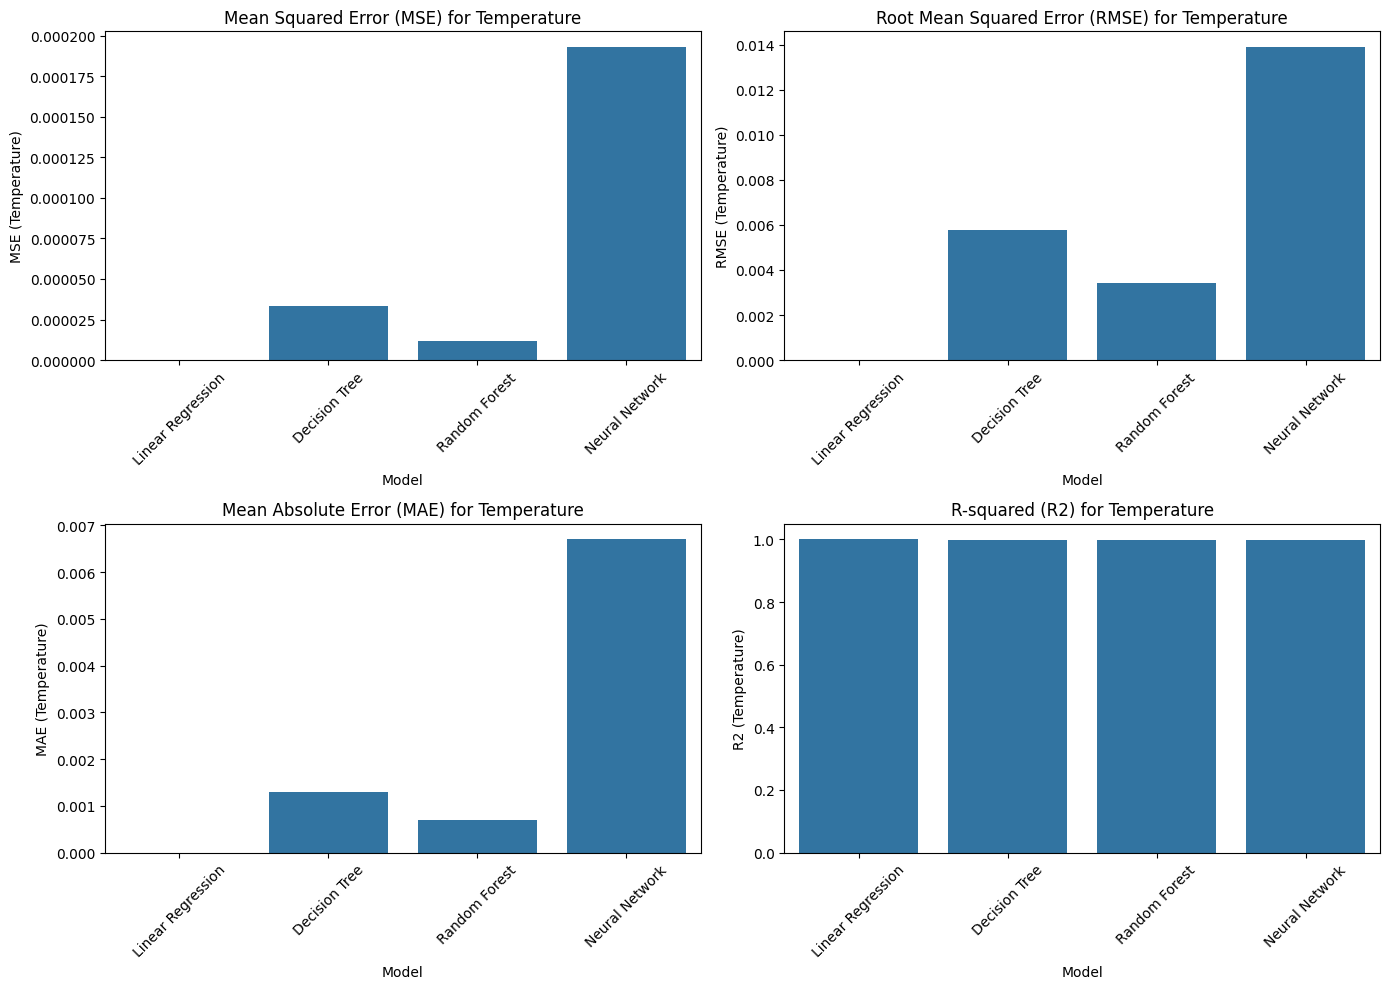

In [ ]:
plot.figure(figsize=(14, 10))

plot.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE (Temperature)', data=temperature_metrics)
plot.title('Mean Squared Error (MSE) for Temperature')
plot.xticks(rotation=45)

plot.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE (Temperature)', data=temperature_metrics)
plot.title('Root Mean Squared Error (RMSE) for Temperature')
plot.xticks(rotation=45)

plot.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE (Temperature)', data=temperature_metrics)
plot.title('Mean Absolute Error (MAE) for Temperature')
plot.xticks(rotation=45)

plot.subplot(2, 2, 4)
sns.barplot(x='Model', y='R2 (Temperature)', data=temperature_metrics)
plot.title('R-squared (R2) for Temperature')
plot.xticks(rotation=45)

plot.tight_layout()
plot.show()

## 3.4. Regression Model Testing

###Hypothesis Testing

**t-Test for Comparing Means between Actual vs Predicted Values**

The t-test checks the mean difference between actual and predicated values which is significantly different from zero. If the p-value is less than 0.05, the difference is statistically significant.

In [ ]:
from scipy.stats import ttest_rel

# t-test for CO2 Emissions
t_stat_emission, p_value_emission = ttest_rel(Y_test_emissions, y_pred_lin_reg_emission)
print('p-value(CO2 emission):', p_value_emission)

p-value(CO2 emission): [1.48872768e-28]



The p-value is below 0.05 which indicates that the difference between the actual and predicted CO2 emisssion of Linear Regression is statistically significant. This means that the observed difference is not due to random chance.

In [ ]:
# t-test for Temperature
t_stat_temp, p_value_temp = ttest_rel(Y_test_temp, y_pred_lin_reg_temp)
print('p-value(temperature):', p_value_temp)

p-value(temperature): [0.01547003]


The p-value is below 0.05 which indicates that the difference between the actual and predicted temperature value is statistically significant. This means that the observed difference is not due to random chance.

### Checking Regression Coefficients Significance

**Check the significance of each feature’s coefficient in Linear Regression**

In [ ]:
import statsmodels.api as sm

# For CO2 emissions
X_train_emissions_sm = sm.add_constant(X_train_emissions_imp)
lin_reg_sm_emission = sm.OLS(Y_train_emissions, X_train_emissions_sm).fit()
print(lin_reg_sm_emission.pvalues)

const    0.000000e+00
x1       9.666500e-13
x2       8.421342e-04
x3       6.957660e-05
x4       6.831718e-02
x5       2.479938e-02
x6       3.828358e-04
x7       3.838920e-01
x8       0.000000e+00
x9       1.646838e-02
dtype: float64


Most of the features have p-values less than 0.05 which indicates that these features contribute to CO2 emission predictions meaningfully.
This test suggests that model fits the data extremely well.


## 3.5. Actual Value Vs Predicted Value of the Linear Regression Model

**This graph gives the clear visual of how predicted values are close to the actual values of Linear Regression Model for CO2 emission.**

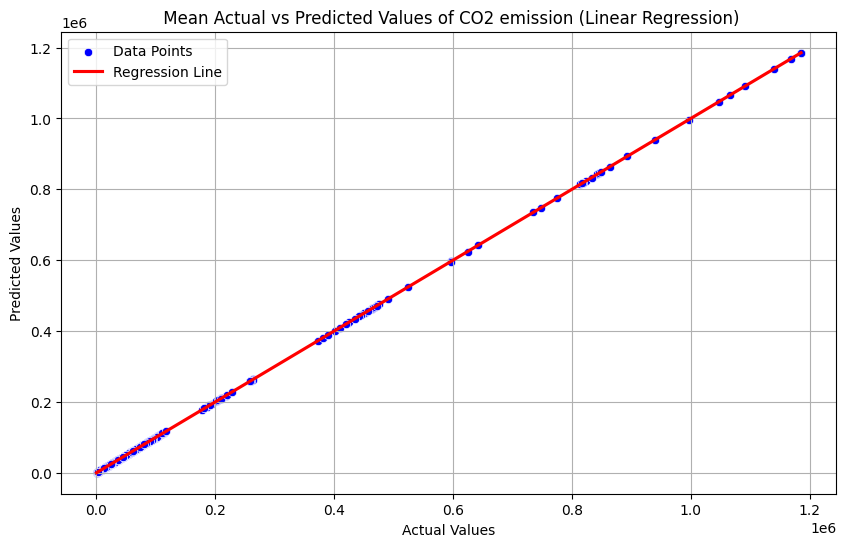

In [ ]:
actual_values = np.array(Y_test_emissions).flatten()
predicted_values = np.array(y_pred_lin_reg_emission).flatten()
plot.figure(figsize=(10, 6))

# Scatter plot for data points of actual vs predicted values
sns.scatterplot(x=actual_values, y=predicted_values, label='Data Points', color='blue')

# a regression line using Seaborn
sns.regplot(x=actual_values, y=predicted_values, scatter=False, color='red', label='Regression Line')

plot.title(' Mean Actual vs Predicted Values of CO2 emission (Linear Regression)')
plot.xlabel('Actual Values')
plot.ylabel('Predicted Values')
plot.legend()
plot.grid(True)
plot.show()

**This graph gives the clear visual of how predicted values are close to the actual values of Linear Regression Model for temperature rise.**

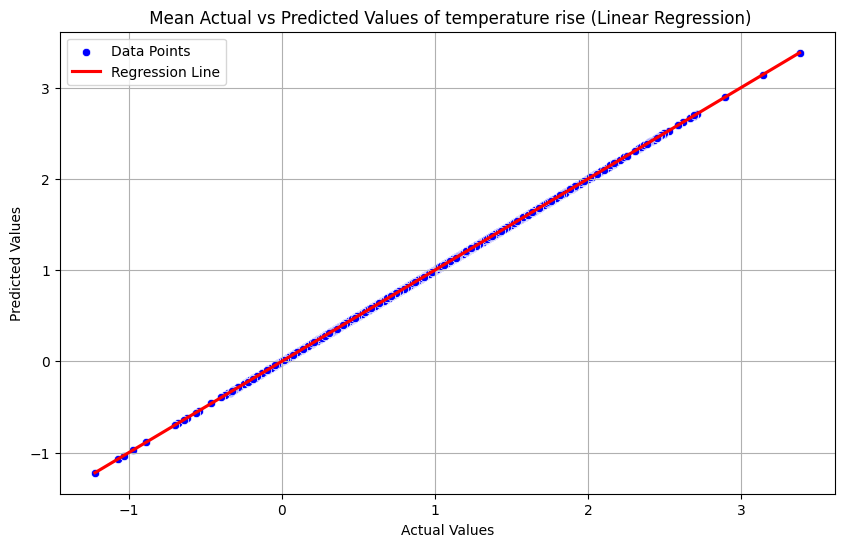

In [ ]:
actual_values = np.array(Y_test_temp).flatten()
predicted_values = np.array(y_pred_lin_reg_temp).flatten()
plot.figure(figsize=(10, 6))

# Scatter plot for data points of actual vs predicted values
sns.scatterplot(x=actual_values, y=predicted_values, label='Data Points', color='blue')

# a regression line using Seaborn
sns.regplot(x=actual_values, y=predicted_values, scatter=False, color='red', label='Regression Line')

plot.title(' Mean Actual vs Predicted Values of temperature rise (Linear Regression)')
plot.xlabel('Actual Values')
plot.ylabel('Predicted Values')
plot.legend()
plot.grid(True)
plot.show()

Conclusion: Linear Regression model emerged as the best model of highest predictive accuracy, with the lowest MSE, RMSE, MAE and highest R2 score value for both CO2 emissions and temperature rise. The study concludes that Linear Regression can serve as a robust tool in predicting CO2 emission from agri-food activities and helps the policy makers, government bodies and sustainable environment by providing useful insights and strategies to reduce the environmental impact of agriculture.